## Import Danych

#### Użyte Biblioteki i ich wersje:
- python: 3.12.7
- pandas: 2.2.3
- seaborn: 0.13.2
- scikit-learn: 1.6.1
- torch: 2.7.0+cu118
- transformers: 4.51.3
- model bardsai/twitter-sentiment-pl-base data publikacji wersji: 2023-07-19
- matplotlib: 3.10.1






- spaCy: 3.8.5
- nltk: 3.9.1
- emoji: 2.14.1
- model pl_core_news_lg : 3.8.0
- TextBlob: 0.18.0.post0


In [2]:
#zaimportowanie bibliotek
import os
#ustawienie zmiennej, aby Hugging Face używał tylko PyTorcha
os.environ["TRANSFORMERS_NO_TF"] = "1"

import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
# zaimportowanie danych
df = pd.read_csv("../data/clean_data_14.04-05.05.csv")

#podzial danych na zbior treningowy i testowy
train_df, test_df = train_test_split(df, test_size=0.2, random_state=1)
train_df.sample(10)

,id,url,tweet,author,created_at,source_file,hasztag/canidate,tweet_clean,tweet_no_stop,tweet_base_no_stop
6396,1919095874841387169,https://x.com/olejnik_lukasz1/status/191909587...,Rybicki łże jak PiS! #WygraCałaPolska #Trzas...,olejnik_lukasz1,Sun May 04 18:24:46 +0000 2025,tweets__Trzaskowski2025_20250505_122839.csv,tweets__Trzaskowski2025,rybicki łże jak pis! wygracałapolska trzaskows...,rybicki łże pis! wygracałapolska trzaskowski2025,Rybicki łże pis! wygracałapolski trzaskowski2025
2239,1918788653133824077,https://x.com/Boomslangggggg/status/1918788653...,Repostuje #Jakimowicz #Stanowski #Dziennikarsk...,Boomslangggggg,Sat May 03 22:03:58 +0000 2025,tweets__Maciak2025_20250505_111741.csv,tweets__Maciak2025,repostuje jakimowicz stanowski dzienikarskieze...,repostuje jakimowicz stanowski dzienikarskieze...,repostować jakimowicz stanowski dzienikarskiez...
4679,1918720505881780461,https://x.com/2Reniaanna29450/status/191872050...,@Barbarzak_M @Dawid12342021 @NawrockiKn #_RT ...,2Reniaanna29450,Sat May 03 17:33:11 +0000 2025,tweets__Nawrocki2025_20250505_111024.csv,tweets__Nawrocki2025,_rt nawrocki2025,_rt nawrocki2025,_ rt nawrocki2025
2493,1915066596932071774,https://x.com/SkokowyPatryk/status/19150665969...,@MarekWoch2 @wPolscepl @Federacja_BiS W pierws...,SkokowyPatryk,Wed Apr 23 15:33:51 +0000 2025,tweets__MarekWoch2025_20250505_120637.csv,tweets__MarekWoch2025,"w pierwszej turze to pan, panie marku, ma mój...","pierwszej turze pan, panie marku, głos! marekw...","pierwszy tura pan, pan marku, głos! marekwoch2025"
4260,1918924298548310161,https://x.com/Prof__Filutek/status/19189242985...,#Nawrocki2025 🇵🇱✌,Prof__Filutek,Sun May 04 07:02:59 +0000 2025,tweets__Nawrocki2025_20250505_111024.csv,tweets__Nawrocki2025,nawrocki2025,nawrocki2025,nawrocki2025
1740,1911985931856323068,https://x.com/Hornbill_Naga/status/19119859318...,@RTEUrdu #zonauang #zelena #heleners #dasperfe...,Hornbill_Naga,Tue Apr 15 03:32:23 +0000 2025,tweets__DebataPrezydencka_20250505_122438.csv,tweets__DebataPrezydencka,zonauang zelena heleners dasperfektediner deb...,zonauang zelena heleners dasperfektediner deba...,zonauang zelena heleners dasperfektediner deba...
2665,1918708041970524388,https://x.com/Wojtekwlkp/status/19187080419705...,Jeśli w #wyboryprezydenckie wybierzecie zielon...,Wojtekwlkp,Sat May 03 16:43:39 +0000 2025,tweets__Mentzen2025_20250505_111555.csv,tweets__Mentzen2025,jeśli w wyboryprezydenckie wybierzecie zielono...,wyboryprezydenckie wybierzecie zielono-tęczowo...,wyboryprezydencki wybierzecie zielony - tęczow...
6184,1919115795096813705,https://x.com/MonikaS72640/status/191911579509...,@Trzaskowski2O25 @trzaskowski_ Brawo #Trzaskow...,MonikaS72640,Sun May 04 19:43:55 +0000 2025,tweets__Trzaskowski2025_20250505_122839.csv,tweets__Trzaskowski2025,brawo trzaskowski2025,brawo trzaskowski2025,brawo trzaskowski2025
3314,1916882518881546559,https://x.com/tobierna/status/1916882518881546559,"@PajakMarcel Mniej podatków, mniej kłopotów! ...",tobierna,Mon Apr 28 15:49:41 +0000 2025,tweets__Mentzen2025_20250505_111555.csv,tweets__Mentzen2025,"mniej podatków, mniej kłopotów! mentzen2025","mniej podatków, mniej kłopotów! mentzen2025","mniej podatek, mniej kłopot! mentzen2025"
1941,1915850607900168308,https://x.com/ZOFIA31984192/status/19158506079...,@KsaweryKo @kubsul2003 @Platforma_org @__Lewic...,ZOFIA31984192,Fri Apr 25 19:29:14 +0000 2025,tweets__Holownia2025_20250505_121943.csv,tweets__Holownia2025,hołownia2025 dlatego musimy głosować na kandy...,"hołownia2025 musimy głosować kandydata, rozpis...","hołownia2025 musieć głosować kandydat, rozpisa..."


In [4]:
#wyeksportowanie danych testowych do CSV (do dodania etykiet, aby potem móc ewaluować modele)

def export_to_csv(df, filename, path):
    full_path = f"{path}/{filename}"
    df.to_csv(full_path, index=False, encoding='utf-8')

export_to_csv(df = test_df, filename= 'test_data_to_tag.csv',  path="../data")

## **Model twitter sentiment pl**

In [212]:
#zaimportowanie bibliotek
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

In [213]:
#model pochodzi z hugging face, model został juz wczesniej przetrenowany na tweetach w jezyku polskim
model_name = "bardsai/twitter-sentiment-pl-base"

#tutaj tokenizer zostanie automatycznie dobrany, na postawie informacji zapisanych w modelu
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

#gotowy pipeline do klasyfikacji
sentiment_pipe = pipeline("text-classification", model=model, tokenizer=tokenizer)


Device set to use cpu


In [214]:
#prztworzenie kolumny 'tweet_clean' za pomocą modelu, wynikiem jest slownik: etkieta+ prawdopodobieństwo
results = sentiment_pipe(train_df['tweet_clean'].tolist(), truncation=True)

# dodanie wynikow do ramki danych (dodaję tylko etykiety)
train_df['predicted_label_twitter_pl'] = [r['label'] for r in results]
train_df

,id,url,tweet,author,created_at,source_file,hasztag/canidate,tweet_clean,tweet_no_stop,tweet_base_no_stop,predicted_label_twitter_pl
1550,1916899926098727231,https://x.com/RepublikaTV/status/1916899926098...,#DebataPrezydencka | @Joanna_Senyszyn do @Nawr...,RepublikaTV,Mon Apr 28 16:58:51 +0000 2025,tweets__DebataPrezydencka_20250505_114856.csv,tweets__DebataPrezydencka,debataprezydencka | do : czy mianuje mnie pan...,debataprezydencka | : mianuje kapelanką ateist...,debataprezydencka |: mianować kapelanka ateist...,negative
7185,1917581766250095101,https://x.com/maks18pl/status/1917581766250095101,Najuczciwszy wybór! #zandberg2025,maks18pl,Wed Apr 30 14:08:14 +0000 2025,tweets__zandberg2025_20250505_110456.csv,tweets__zandberg2025,najuczciwszy wybór! zandberg2025,najuczciwszy wybór! zandberg2025,najuczcić wybór! zandberg2025,positive
2921,1917987273531949212,https://x.com/KONFEDERACJA_/status/19179872735...,"Chrzanów głosuje na Mentzena❗ - mnóstwo ludzi,...",KONFEDERACJA_,Thu May 01 16:59:35 +0000 2025,tweets__Mentzen2025_20250505_111555.csv,tweets__Mentzen2025,"chrzanów głosuje na mentzena - mnóstwo ludzi,...","chrzanów głosuje mentzena - mnóstwo ludzi, świ...","chrzan głosować mentzena - mnóstwo człowiek, ś...",positive
1506,1916910689106395421,https://x.com/Gorekkibic/status/19169106891063...,"tuskowskiemu jak i kamień serca, że magicznie ...",Gorekkibic,Mon Apr 28 17:41:37 +0000 2025,tweets__DebataPrezydencka_20250505_114856.csv,tweets__DebataPrezydencka,"tuskowskiemu jak i kamień serca, że magicznie ...","tuskowskiemu kamień serca, magicznie wylosował...","tuskowskiemu kamień serce, magicznie wylosować...",positive
2004,1915671249537139056,https://x.com/ZOFIA31984192/status/19156712495...,Otóż to 👍👏. #Hołownia2025,ZOFIA31984192,Fri Apr 25 07:36:31 +0000 2025,tweets__Holownia2025_20250505_121943.csv,tweets__Holownia2025,otóż to . hołownia2025,otóż . hołownia2025,otóż. hołownia2025,neutral
...,...,...,...,...,...,...,...,...,...,...,...
905,1919095814468563375,https://x.com/Seba_okreg20/status/191909581446...,Pamiętacie ostatnią debatę ?#Braun2025 https:/...,Seba_okreg20,Sun May 04 18:24:31 +0000 2025,tweets__Braun2025_20250505_114232.csv,tweets__Braun2025,pamiętacie ostatnią debatę ? braun2025,pamiętacie ostatnią debatę ? braun2025,pamiętacie ostatni debata? braun2025,neutral
5192,1908987668543029592,https://x.com/gregtegregszeg/status/1908987668...,@KarolPopieramy Żenada xd,gregtegregszeg,Sun Apr 06 20:58:22 +0000 2025,tweets__Nawrocki_replies_1908581002517139924_2...,tweets__Nawrocki,żenada xd,żenada xd,żenada xd,positive
3980,1918985801922187487,https://x.com/2022JEJ/status/1918985801922187487,🇵🇱 #Nawrocki2025 🇵🇱 #PolacyZNawrockim 🇵🇱 https...,2022JEJ,Sun May 04 11:07:22 +0000 2025,tweets__Nawrocki2025_20250505_111024.csv,tweets__Nawrocki2025,nawrocki2025 polacyznawrockim,nawrocki2025 polacyznawrockim,nawrocki2025 polacyznawrocki,neutral
235,1917508208358285726,https://x.com/Lewica_News/status/1917508208358...,BITWA NA ARGUMENTY #Biejat2025|@MagdaBiejat ...,Lewica_News,Wed Apr 30 09:15:57 +0000 2025,tweets__Biejat2025_20250505_114449.csv,tweets__Biejat2025,bitwa na argumenty biejat2025| vs. hołownia202...,bitwa argumenty biejat2025| vs. hołownia2025| ...,bitwa argument biejat2025| vs. hołownia2025| t...,neutral


In [215]:
train_df['tweet_base_no_stop'] = train_df['tweet_base_no_stop'].fillna('')
train_df['tweet_base_no_stop'] = train_df['tweet_base_no_stop'].astype(str)

In [216]:
#prztworzenie kolumny 'tweet_base_no_stop' za pomocą modelu

results_bns = sentiment_pipe(train_df['tweet_base_no_stop'].tolist(), truncation=True)

train_df['predicted_label_twitter_pl_bns'] = [r['label'] for r in results_bns]

In [217]:
train_df.sample(10)

,id,url,tweet,author,created_at,source_file,hasztag/canidate,tweet_clean,tweet_no_stop,tweet_base_no_stop,predicted_label_twitter_pl,predicted_label_twitter_pl_bns
3003,1917634091194740937,https://x.com/Lech06016580/status/191763409119...,@KONFEDERACJA_ @SlawomirMentzen #Mentzen2025 n...,Lech06016580,Wed Apr 30 17:36:09 +0000 2025,tweets__Mentzen2025_20250505_111555.csv,tweets__Mentzen2025,mentzen2025 na prezydenta!,mentzen2025 prezydenta!,mentzen2025 prezydent!,positive,positive
7355,1912253265456046142,https://x.com/meowkins2137/status/191225326545...,@GM20198114 #zandberg2025,meowkins2137,Tue Apr 15 21:14:41 +0000 2025,tweets__zandberg2025_20250505_120449.csv,tweets__zandberg2025,zandberg2025,zandberg2025,zandberg2025,positive,positive
5343,1911886875767275625,https://x.com/FranekKrnabrny/status/1911886875...,Stanowski właśnie w debacie doszedł do wniosku...,FranekKrnabrny,Mon Apr 14 20:58:46 +0000 2025,tweets__Stanowski2025_20250505_121331.csv,tweets__Stanowski2025,stanowski właśnie w debacie doszedł do wniosku...,"stanowski debacie doszedł wniosku, politycy. u...","Stanowski debata dojść wniosek, polityk. uwaga...",negative,negative
6693,1919353624016105806,https://x.com/Piotre_wert_efg/status/191935362...,@trzaskowski_ Spierdalaj cioto.,Piotre_wert_efg,Mon May 05 11:28:58 +0000 2025,tweets__Trzaskowski_replies_191911291163890924...,tweets__Trzaskowski,spierdalaj cioto.,spierdalaj cioto.,spierdalaj cioto.,positive,positive
486,1912506311935139901,https://x.com/LublinNIEDLAPIS/status/191250631...,"Biejat w Lublinie, dzień dobry ! #Biejat2025 h...",LublinNIEDLAPIS,Wed Apr 16 14:00:12 +0000 2025,tweets__Biejat2025_20250505_122318.csv,tweets__Biejat2025,"biejat w lublinie, dzień dobry ! biejat2025","biejat lublinie, dzień dobry ! biejat2025","biejat Lublin, dzień dobry! biejat2025",positive,positive
3306,1916888658474307643,https://x.com/mdw_warszawa_/status/19168886584...,No i fajrancik #debata #superexpress #Wybory20...,mdw_warszawa_,Mon Apr 28 16:14:04 +0000 2025,tweets__Mentzen2025_20250505_111555.csv,tweets__Mentzen2025,no i fajrancik debata superexpres wybory2025 m...,fajrancik debata superexpres wybory2025 mentze...,fajrancik debata superexpres wybory2025 mentze...,positive,positive
3874,1919011216795516951,https://x.com/rutkowski1PiS/status/19190112167...,Jutro spotkania Karola Nawrockiego z mieszkańc...,rutkowski1PiS,Sun May 04 12:48:22 +0000 2025,tweets__Nawrocki2025_20250505_111024.csv,tweets__Nawrocki2025,jutro spotkania karola nawrockiego z mieszkańc...,jutro spotkania karola nawrockiego mieszkańcam...,jutro spotkanie karol nawrockiego mieszkańc re...,neutral,neutral
5072,1916190688296812664,https://x.com/joslobie/status/1916190688296812664,"🤡Trzask-reset z Rosją,""nord stream to inicjaty...",joslobie,Sat Apr 26 18:00:35 +0000 2025,tweets__Nawrocki2025_20250505_121657.csv,tweets__Nawrocki2025,"trzask-reset z rosją,""nord stream to inicjaty...","trzask-reset rosją,""nord stream inicjatywa biz...","trzask - reset rosją,""nord stream inicjatywa b...",neutral,neutral
7237,1915843334700163495,https://x.com/konkordian/status/19158433347001...,@gin_z_tonickiem @barpiotrowski A w drugiej #Z...,konkordian,Fri Apr 25 19:00:20 +0000 2025,tweets__zandberg2025_20250505_120449.csv,tweets__zandberg2025,a w drugiej zandberg2025,drugiej zandberg2025,drugi zandberg2025,neutral,neutral
7224,1916875225553109261,https://x.com/owca_ola/status/1916875225553109261,ZRÓBMY HAŁAS i oglądajmy❗️🇵🇱#ZANDBERG2025,owca_ola,Mon Apr 28 15:20:42 +0000 2025,tweets__zandberg2025_20250505_110456.csv,tweets__zandberg2025,zróbmy hałas i oglądajmy zandberg2025,zróbmy hałas oglądajmy zandberg2025,zróbmy hałas oglądać zandberg2025,neutral,neutral


### Porównanie na jakich danych model sobie lepiej porawdził

In [218]:
#wczytanie bibliotek
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#wczytanie otagowanego zbioru testowego
test_df_tag = pd.read_csv("../data/test_data_tags.csv")

test_df_tag = test_df_tag.iloc[:, :11]
test_df_tag.sample(10)

,id,url,label,tweet,author,created_at,source_file,hasztag/canidate,tweet_clean,tweet_no_stop,tweet_base_no_stop
869,1.920000e+18,https://x.com/PeterOlcha/status/19161918817818...,neutralny,#Trzaskowski2025,PeterOlcha,Sat Apr 26 18:05:20 +0000 2025,tweets__Trzaskowski2025_20250505_121152.csv,tweets__Trzaskowski2025,trzaskowski2025,trzaskowski2025,trzaskowski2025
753,1.920000e+18,https://x.com/MarSypniewski/status/19189676160...,pozytywny,Od rana w trasie @SlawomirMentzen na Pomorzu. ...,MarSypniewski,Sun May 04 09:55:07 +0000 2025,tweets__Mentzen2025_20250505_111555.csv,tweets__Mentzen2025,"od rana w trasie na pomorzu. godzina 1 sztum, ...","rana trasie pomorzu. godzina 1 sztum, piękna s...","rano trasa pomorzu. godzina 1 sztum, piękny sc..."
667,1.920000e+18,https://x.com/Basia96508195/status/19191492406...,pozytywny,@margeritum @azewicz_zuzanna @mal09go Trzaskam...,Basia96508195,Sun May 04 21:56:49 +0000 2025,tweets__Trzaskowski2025_20250505_122839.csv,tweets__Trzaskowski2025,trzaskamy do końca liczy się tylko rafał pi...,trzaskamy końca liczy rafał pierwszaturadlabąż...,trzaskać koniec liczyć rafał pierwszaturadlabą...
1327,1.920000e+18,https://x.com/MARVIN20420/status/1916214825266...,pozytywny,Celnie👍#Trzaskowski2025,MARVIN20420,Sat Apr 26 19:36:30 +0000 2025,tweets__Trzaskowski2025_20250505_121152.csv,tweets__Trzaskowski2025,celnie trzaskowski2025,celnie trzaskowski2025,celnie trzaskowski2025
1310,1.920000e+18,https://x.com/W_Bernacki/status/19189492549003...,pozytywny,Rozpoczynamy akcję na giełdzie w Proszowicach....,W_Bernacki,Sun May 04 08:42:09 +0000 2025,tweets__Nawrocki2025_20250505_111024.csv,tweets__Nawrocki2025,rozpoczynamy akcję na giełdzie w proszowicach....,rozpoczynamy akcję giełdzie proszowicach. rozd...,rozpoczynać akcja giełdzie proszowicach. rozda...
639,1.910000e+18,https://x.com/shidokoto/status/191255848702177...,pozytywny,MY president #zandberg2025 https://t.co/JFMSYV...,shidokoto,Wed Apr 16 17:27:31 +0000 2025,tweets__zandberg2025_20250505_120449.csv,tweets__zandberg2025,my president zandberg2025,president zandberg2025,president zandberg2025
151,1.920000e+18,https://x.com/qnol69/status/1918659452275765392,neutralny,@T_tuoopp #Nawrocki2025 👍👍👍👍👍,qnol69,Sat May 03 13:30:35 +0000 2025,tweets__Nawrocki2025_20250505_111024.csv,tweets__Nawrocki2025,nawrocki2025,nawrocki2025,nawrocki2025
205,1.920000e+18,https://x.com/ewairmina/status/191886513143544...,pozytywny,"Już za 6 dni, w sobotę 10 maja Karol Nawrocki ...",ewairmina,Sun May 04 03:07:52 +0000 2025,tweets__Nawrocki2025_20250505_111024.csv,tweets__Nawrocki2025,"już za 6 dni, w sobotę 10 maja karol nawrocki ...","6 dni, sobotę 10 maja karol nawrocki spotka mi...","6 dzień, sobota 10 maj Karol nawrocki spotkać ..."
846,1.920000e+18,https://x.com/konrad_wojtek/status/19178189258...,negatywny,@KDybowicz @szymon_holownia @MagdaBiejat Mentz...,konrad_wojtek,Thu May 01 05:50:37 +0000 2025,tweets__Holownia_replies_1917637452530954514_2...,tweets__Holownia,"mentzen, to dzisiejszy ""kukiz15"", jest wyraze...","mentzen, dzisiejszy ""kukiz15"", wyrazem bezmyśl...","mentzen, dzisiejszy "" kukiz15 "", wyraz bezmyśl..."
300,1.920000e+18,https://x.com/Izabela12671885/status/191907510...,negatywny,@RafalBochenek @p_zuchowski Widzisz bochenek.....,Izabela12671885,Sun May 04 17:02:15 +0000 2025,tweets__Trzaskowski2025_20250505_122839.csv,tweets__Trzaskowski2025,widzisz bochenek. jesteście bandą nieudacznik...,widzisz bochenek. jesteście bandą nieudacznikó...,widzieć bochenek. jesteście banda nieudacznik....


In [232]:
#zmiana kodowania etykiet

label_map = {
    'negative': 'negatywny',
    'neutral': 'neutralny',
    'positive': 'pozytywny'
}

In [233]:
#funkcja do przewidywania sentymentu + zmapowania etykiet

def predict_sentiment(texts):
    results_pred = sentiment_pipe(list(texts))
    return [label_map[res['label']] for res in results_pred]

In [234]:
#predykcja na danych testowych

test_df_tag['pred_clean'] = predict_sentiment(test_df_tag['tweet_clean'])
test_df_tag['pred_base_no_stop'] = predict_sentiment(test_df_tag['tweet_base_no_stop'])
test_df_tag['pred'] = predict_sentiment(test_df_tag['tweet'])

In [236]:
test_df_tag.sample(10)

,id,url,label,tweet,author,created_at,source_file,hasztag/canidate,tweet_clean,tweet_no_stop,tweet_base_no_stop,pred_clean,pred_base_no_stop,pred
281,1.920000e+18,https://x.com/GregorSRV/status/191653412327704...,neutralny,@lechyslaw @MagdaBiejat @Lewica_News @__Lewica...,GregorSRV,Sun Apr 27 16:45:17 +0000 2025,tweets__Biejat_replies_1916532829762064668_202...,tweets__Biejat,fan mentzena nie zna takiego miasta ?,fan mentzena zna takiego miasta ?,fan mentzena znać taki miasto?,pozytywny,neutralny,neutralny
1365,1.920000e+18,https://x.com/JanczukAneta/status/191909118975...,negatywny,@AlexandraKarpi2 @MariaGolonka2 Pamiętam to śr...,JanczukAneta,Sun May 04 18:06:09 +0000 2025,tweets__Trzaskowski2025_20250505_122839.csv,tweets__Trzaskowski2025,"pamiętam to średniowiecze, kłamstwa, butę, py...","pamiętam średniowiecze, kłamstwa, butę, pychę ...","pamiętać średniowiecze, kłamstwo, buta, pycha ...",negatywny,negatywny,negatywny
855,1.920000e+18,https://x.com/hannah_matar/status/191866293627...,neutralny,#BGYO #Nawrocki2025 #Mora,hannah_matar,Sat May 03 13:44:25 +0000 2025,tweets__Nawrocki2025_20250505_111024.csv,tweets__Nawrocki2025,bgyo nawrocki2025 mora,bgyo nawrocki2025 mora,bgyo nawrocki2025 mora,neutralny,neutralny,neutralny
405,1.920000e+18,https://x.com/Ren4ta_H/status/1918961392767394082,negatywny,@HubnerrMax Śmieszne jest bardzo i jakoś żałos...,Ren4ta_H,Sun May 04 09:30:23 +0000 2025,tweets__Nawrocki2025_20250505_111024.csv,tweets__Nawrocki2025,"śmieszne jest bardzo i jakoś żałosne, na pods...","śmieszne żałosne, podstawie jednego plakatu us...","śmieszny żałosny, podstawa jeden plakat usłużn...",negatywny,negatywny,negatywny
537,1.920000e+18,https://x.com/VipGameS_FPA/status/191763993193...,negatywny,"@WojtekAndrzej To chyba #Mentzen2025 jak już, ...",VipGameS_FPA,Wed Apr 30 17:59:22 +0000 2025,tweets__Mentzen2025_20250505_111555.csv,tweets__Mentzen2025,"to chyba mentzen2025 jak już, przynajmniej je...","chyba mentzen2025 już, przynajmniej autentyczn...","chyba mentzen2025 już, przynajmniej autentyczn...",pozytywny,neutralny,neutralny
415,1.920000e+18,https://x.com/HectorGregores/status/1915111433...,negatywny,"Od początku wiedziałem, że żaden kandydat się ...",HectorGregores,Wed Apr 23 18:32:01 +0000 2025,tweets__zandberg2025_20250505_120449.csv,tweets__zandberg2025,"od początku wiedziałem, że żaden kandydat się ...","początku wiedziałem, kandydat nadaje, zmiksowa...","początek wiedzieć być, kandydat nadawać, zmiks...",neutralny,neutralny,neutralny
440,1.920000e+18,https://x.com/lukiluki2024/status/191895921030...,neutralny,#Nawrocki2025,lukiluki2024,Sun May 04 09:21:42 +0000 2025,tweets__Nawrocki2025_20250505_111024.csv,tweets__Nawrocki2025,nawrocki2025,nawrocki2025,nawrocki2025,neutralny,neutralny,neutralny
331,1.920000e+18,https://x.com/Ren4ta_H/status/1918968014206128399,negatywny,@Pani_Scarlett @mmarcinkiewicz Z tego teamu dw...,Ren4ta_H,Sun May 04 09:56:41 +0000 2025,tweets__Nawrocki2025_20250505_111024.csv,tweets__Nawrocki2025,"z tego teamu dwie osoby patrzą w kamerę, resz...","teamu osoby patrzą kamerę, reszta odwrócona ok...","team osoba patrzeć kamera, reszta odwrócić oku...",neutralny,negatywny,neutralny
655,1.920000e+18,https://x.com/ewasumasum/status/19191494367284...,pozytywny,@MariaGolonka2 18V #WygraCałaPolska #Trzaskamy...,ewasumasum,Sun May 04 21:57:36 +0000 2025,tweets__Trzaskowski2025_20250505_122839.csv,tweets__Trzaskowski2025,18v wygracałapolska trzaskamypierwsząturę trz...,18v wygracałapolska trzaskamypierwsząturę trza...,18v wygracałapolski trzaskamypierwsząturę trza...,neutralny,neutralny,neutralny
1180,1.890000e+18,https://x.com/Jimmy2995189440/status/189115732...,negatywny,"@Andruszkiewicz1 @Nawrocki25 Ty pajacu, to wyb...",Jimmy2995189440,Sun Feb 16 16:06:56 +0000 2025,tweets__Nawrocki_replies_1890484423528681746_2...,tweets__Nawrocki,"ty pajacu, to wybory prezydenckie a nie olimp...","pajacu, wybory prezydenckie olimpiada.","pajacu, wybory prezydencki olimpiada.",negatywny,pozytywny,negatywn

#### Tabela klasyfikacj

In [237]:
#funkcja zbierająca dane do tabeli klasyfikacji
def data_evaluation_table ( y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict= True, zero_division=0)
    accuracy = accuracy_score(y_true, y_pred)
    df = pd.DataFrame(report).T
    df['model'] = model_name
    df.loc['accuracy'] = [accuracy, accuracy, accuracy, None, model_name]
    return df.reset_index().rename(columns ={'index': 'label'})


In [238]:
#ewaluacja dla trzech kolumn: "tweet", "tweet_clean" i "tweet_base_no_stop"

report= data_evaluation_table(test_df_tag['label'], test_df_tag['pred'], 'tweet')
report_clean= data_evaluation_table(test_df_tag['label'], test_df_tag['pred_clean'], 'tweet_cleaned')
report_base_no_stop= data_evaluation_table(test_df_tag['label'], test_df_tag['pred_base_no_stop'], 'tweet_lemmatized')

In [239]:
#połaczenie wszystkich danych w jednej tabeli

evaluation_report = pd.concat([report, report_clean, report_base_no_stop], ignore_index=True)
evaluation_report = evaluation_report[['model', 'label', 'precision', 'recall', 'f1-score', 'support']]
evaluation_report

,model,label,precision,recall,f1-score,support
0,tweet,negatywny,0.893891,0.502712,0.643519,553.0
1,tweet,neutralny,0.455034,0.858228,0.594737,395.0
2,tweet,pozytywny,0.754630,0.603704,0.670782,540.0
3,tweet,accuracy,0.633737,0.633737,0.633737,NaN
4,tweet,macro avg,0.701185,0.654881,0.636346,1488.0
5,tweet,weighted avg,0.726855,0.633737,0.640463,1488.0
6,tweet_cleaned,negatywny,0.878049,0.520796,0.653802,553.0
7,tweet_cleaned,neutralny,0.423752,0.794937,0.552817,395.0
8,tweet_cleaned,pozytywny,0.723150,0.561111,0.631908,540.0
9,tweet_cleaned,accuracy,0.608199,0.608199,0.608199,NaN


#### Macierz poyłek

In [240]:
from matplotlib.pyplot import figure

In [241]:
def confusion_matrics (y_true, y_pred, title):
    num_plots = len(y_true)
    fig, axes = plt.subplots(1, num_plots, figsize = [18, 5])

    for i in range(num_plots):
        cm = confusion_matrix( y_true[i], y_pred[i] , labels=sorted(set(y_true[i]) | set(y_pred[i] )))

        sns.heatmap(cm, annot = True, cmap = "RdPu", fmt = 'd',
                    xticklabels = sorted(set(y_true[i]) | set(y_pred[i])),
                    yticklabels = sorted(set(y_true[i]) | set(y_pred[i])),
                    ax = axes[i])

        axes[i].set_title(title[i])
        axes[i].set_xlabel("Predicted")
        axes[i].set_ylabel("True")

    plt.tight_layout()
    plt.show()


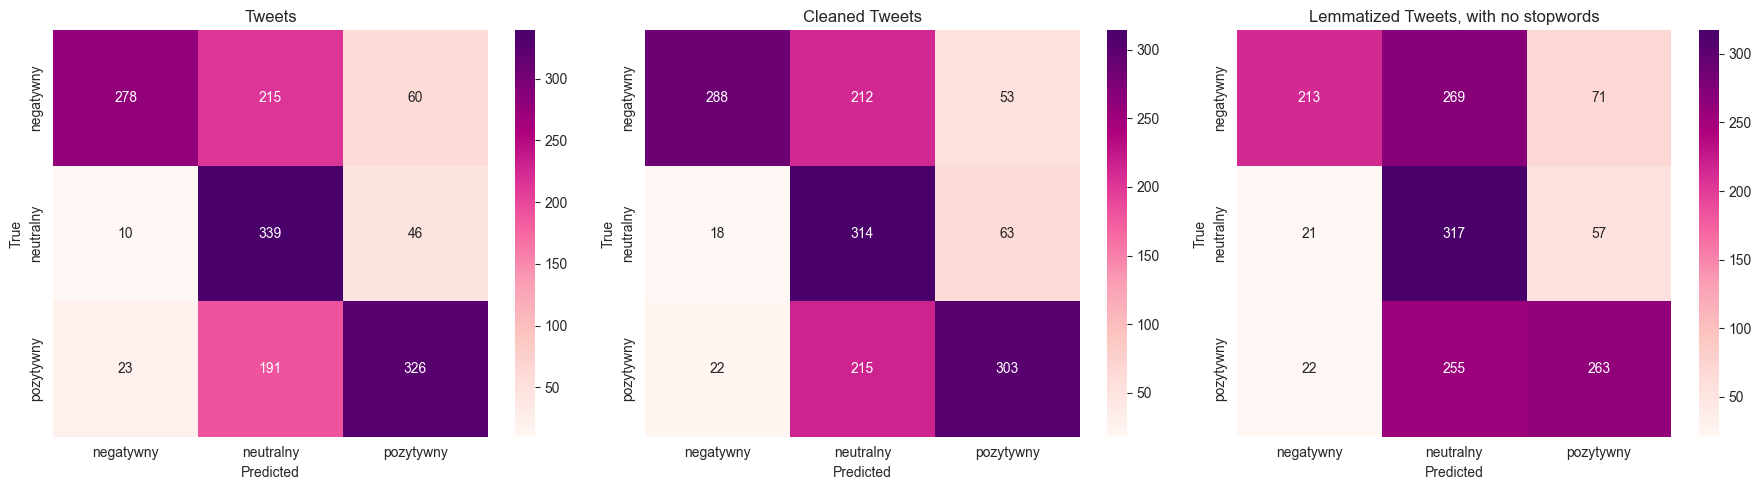

In [242]:
confusion_matrics(
    y_true = [test_df_tag['label'], test_df_tag['label'], test_df_tag['label']],
    y_pred = [test_df_tag['pred'], test_df_tag['pred_clean'], test_df_tag['pred_base_no_stop']],
    title = ['Tweets', "Cleaned Tweets", 'Lemmatized Tweets, with no stopwords']
)

Spośród trzech wersji danych, model osiągnął najlepsze wyniki na kolumnie "tweet", a więc na nieoczyszczonych danych.
W tym przypadku model osiągnął najwyższe wartości: Accuracy (0.63) oraz F1 score. Model całkiem dobrze radzi sobie z klasyfikacją pozytywnych i negatywnych tweetów. Jednak ma duże trudności z rozpoznawaniem tweetow neutralnych.
Model na danych z kolumny "tweet" zostanie użyty do porównań z kolejnymi modelami


## **Model TF-IDF**

In [146]:
#zaimportowanie bibliotek
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [243]:
# zaimportowanie danych
df_tfidf = pd.read_csv("../data/clean_data 14.04-05.05.csv")

#podzial danych na zbior treningowy i testowy
from sklearn.model_selection import train_test_split

df_train_tfidf, df_test_tfidf = train_test_split(df_tfidf, test_size=0.2, random_state=1,)
df_train_tfidf

,id,url,tweet,author,created_at,source_file,hasztag/canidate,tweet_clean,tweet_no_stop,tweet_base_no_stop
1550,1916899926098727231,https://x.com/RepublikaTV/status/1916899926098...,#DebataPrezydencka | @Joanna_Senyszyn do @Nawr...,RepublikaTV,Mon Apr 28 16:58:51 +0000 2025,tweets__DebataPrezydencka_20250505_114856.csv,tweets__DebataPrezydencka,debataprezydencka | do : czy mianuje mnie pan...,debataprezydencka | : mianuje kapelanką ateist...,debataprezydencka |: mianować kapelanka ateist...
7185,1917581766250095101,https://x.com/maks18pl/status/1917581766250095101,Najuczciwszy wybór! #zandberg2025,maks18pl,Wed Apr 30 14:08:14 +0000 2025,tweets__zandberg2025_20250505_110456.csv,tweets__zandberg2025,najuczciwszy wybór! zandberg2025,najuczciwszy wybór! zandberg2025,najuczcić wybór! zandberg2025
2921,1917987273531949212,https://x.com/KONFEDERACJA_/status/19179872735...,"Chrzanów głosuje na Mentzena❗ - mnóstwo ludzi,...",KONFEDERACJA_,Thu May 01 16:59:35 +0000 2025,tweets__Mentzen2025_20250505_111555.csv,tweets__Mentzen2025,"chrzanów głosuje na mentzena - mnóstwo ludzi,...","chrzanów głosuje mentzena - mnóstwo ludzi, świ...","chrzan głosować mentzena - mnóstwo człowiek, ś..."
1506,1916910689106395421,https://x.com/Gorekkibic/status/19169106891063...,"tuskowskiemu jak i kamień serca, że magicznie ...",Gorekkibic,Mon Apr 28 17:41:37 +0000 2025,tweets__DebataPrezydencka_20250505_114856.csv,tweets__DebataPrezydencka,"tuskowskiemu jak i kamień serca, że magicznie ...","tuskowskiemu kamień serca, magicznie wylosował...","tuskowskiemu kamień serce, magicznie wylosować..."
2004,1915671249537139056,https://x.com/ZOFIA31984192/status/19156712495...,Otóż to 👍👏. #Hołownia2025,ZOFIA31984192,Fri Apr 25 07:36:31 +0000 2025,tweets__Holownia2025_20250505_121943.csv,tweets__Holownia2025,otóż to . hołownia2025,otóż . hołownia2025,otóż. hołownia2025
...,...,...,...,...,...,...,...,...,...,...
905,1919095814468563375,https://x.com/Seba_okreg20/status/191909581446...,Pamiętacie ostatnią debatę ?#Braun2025 https:/...,Seba_okreg20,Sun May 04 18:24:31 +0000 2025,tweets__Braun2025_20250505_114232.csv,tweets__Braun2025,pamiętacie ostatnią debatę ? braun2025,pamiętacie ostatnią debatę ? braun2025,pamiętacie ostatni debata? braun2025
5192,1908987668543029592,https://x.com/gregtegregszeg/status/1908987668...,@KarolPopieramy Żenada xd,gregtegregszeg,Sun Apr 06 20:58:22 +0000 2025,tweets__Nawrocki_replies_1908581002517139924_2...,tweets__Nawrocki,żenada xd,żenada xd,żenada xd
3980,1918985801922187487,https://x.com/2022JEJ/status/1918985801922187487,🇵🇱 #Nawrocki2025 🇵🇱 #PolacyZNawrockim 🇵🇱 https...,2022JEJ,Sun May 04 11:07:22 +0000 2025,tweets__Nawrocki2025_20250505_111024.csv,tweets__Nawrocki2025,nawrocki2025 polacyznawrockim,nawrocki2025 polacyznawrockim,nawrocki2025 polacyznawrocki
235,1917508208358285726,https://x.com/Lewica_News/status/1917508208358...,BITWA NA ARGUMENTY #Biejat2025|@MagdaBiejat ...,Lewica_News,Wed Apr 30 09:15:57 +0000 2025,tweets__Biejat2025_20250505_114449.csv,tweets__Biejat2025,bitwa na argumenty biejat2025| vs. hołownia202...,bitwa argumenty biejat2025| vs. hołownia2025| ...,bitwa argument biejat2025| vs. hołownia2025| t...


In [244]:
#wybranie probki, która zostanie oznaczona do trenowania modelu

df_tfidf_sample = df_train_tfidf.sample(1000, random_state = 1)
export_to_csv(df = df_tfidf_sample, filename= 'do_oznaczenia.csv',  path="../data")

In [7]:
#wgranie oznaczonej próbki
df_tfidf_tags = pd.read_csv("../data/train_tags.csv")

df_tfidf_tags['label'].value_counts()


label
pozytywny    372
neutralny    327
negatywny    301
Name: count, dtype: int64

In [248]:
df_tfidf_tags

,id,url,tweet,author,created_at,source_file,hasztag/canidate,tweet_clean,tweet_no_stop,tweet_base_no_stop,label
0,1.919320e+18,https://x.com/PiotrJurkowsk11/status/191932324...,@PolacySzwajca @K_Stanowski Nie mów nikomu co ...,PiotrJurkowsk11,Mon May 05 09:28:15 +0000 2025,tweets__Stanowski_replies_1918955761368961146_...,tweets__Stanowski,nie mów nikomu co powinien,mów nikomu,mówić nikt,negatywny
1,1.916250e+18,https://x.com/baniaste/status/1916247082165293101,@epwok2 Cześć! Jestem zwykłym człowiekiem Mam ...,baniaste,Sat Apr 26 21:44:41 +0000 2025,tweets__Mentzen2025_20250505_121753.csv,tweets__Mentzen2025,cześć! jestem zwykłym człowiekiem mam dobrą p...,cześć! zwykłym człowiekiem dobrą pamięć chcę ż...,cześć! zwykły człowiek dobry pamięć chcieć żyć...,negatywny
2,1.919100e+18,https://x.com/marabir777/status/19191030636729...,@Trzaskowski2O25 @trzaskowski_ Dlatego trzeba ...,marabir777,Sun May 04 18:53:20 +0000 2025,tweets__Mentzen2025_20250505_111555.csv,tweets__Mentzen2025,dlatego trzeba głosować na mentzen2025,głosować mentzen2025,głosować mentzen2025,pozytywny
3,1.919110e+18,https://x.com/Betag2Ma/status/1919110280635707418,@kstomaszczyk1 @ElzbietaSa27948 @AnnaRomejk425...,Betag2Ma,Sun May 04 19:22:00 +0000 2025,tweets__Trzaskowski2025_20250505_122839.csv,tweets__Trzaskowski2025,dziękuję za zaproszenie wytrzaskajmy jedną ...,dziękuję zaproszenie wytrzaskajmy jedną turę t...,dziękować zaproszenie wytrzaskać jeden tura tr...,pozytywny
4,1.918730e+18,https://x.com/NiebrzydkiZenon/status/191872668...,@szefernaker Brawo Panowie sztabowcy :) #Nawro...,NiebrzydkiZenon,Sat May 03 17:57:43 +0000 2025,tweets__Nawrocki2025_20250505_111024.csv,tweets__Nawrocki2025,brawo panowie sztabowcy :) nawrocki2025,brawo panowie sztabowcy :) nawrocki2025,brawo pan sztabowiec:) nawrocki2025,pozytywny
...,...,...,...,...,...,...,...,...,...,...,...
995,1.918910e+18,https://x.com/Grazynagrazka12/status/191890733...,@Trzaskowski2O25 @trzaskowski_ Masz Pan rację ...,Grazynagrazka12,Sun May 04 05:55:36 +0000 2025,tweets__Nawrocki2025_20250505_111024.csv,tweets__Nawrocki2025,masz pan rację dlatego tylko nawrocki2025,masz rację nawrocki2025,mieć racja nawrocki2025,pozytywny
996,1.915670e+18,https://x.com/PawelEdi/status/1915672661113393181,"@jakubiak_marek Panie Marku, mój wujek prosił ...",PawelEdi,Fri Apr 25 07:42:08 +0000 2025,tweets__Jakubiak_replies_1915122574050398590_2...,tweets__Jakubiak,"panie marku, mój wujek prosił żebym wysłał, b...","panie marku, wujek prosił żebym wysłał, pewnie...","pan marku, wujek prosić żeby być wysłać, pewni...",neutralny
997,1.919110e+18,https://x.com/dominikras/status/19191146204106...,Prezydent miasta bywa w Warszawie 1 raz w tygo...,dominikras,Sun May 04 19:39:15 +0000 2025,tweets__Trzaskowski2025_20250505_122839.csv,tweets__Trzaskowski2025,prezydent miasta bywa w warszawie 1 raz w tygo...,prezydent miasta bywa warszawie 1 tygodniu. 2....,prezydent miasto bywać Warszawa 1 tydzień. 2. ...,neutralny
998,1.919070e+18,https://x.com/PoprostuIga/status/1919073558883...,@SlawomirMentzen Ilu z tych ludzi ma prawa wyb...,PoprostuIga,Sun May 04 16:56:05 +0000 2025,tweets__Mentzen_replies_1919057413300179189_20...,tweets__Mentzen,ilu z tych ludzi ma prawa wyborcze?,ilu ludzi prawa wyborcze?,ile człowiek prawo wyborczy?,neutralny


In [247]:
#TF-IDF
vectorizer = TfidfVectorizer(
    max_df=0.9,
    min_df=5,
    ngram_range=(1, 2))

In [249]:
df_tfidf_tags['tweet_base_no_stop'] = df_tfidf_tags['tweet_base_no_stop'].fillna('')
df_tfidf_tags['tweet_base_no_stop'] = df_tfidf_tags['tweet_base_no_stop'].astype(str)

X_train_tfidf = vectorizer.fit_transform(df_tfidf_tags['tweet_base_no_stop'])
y_train_tfidf = df_tfidf_tags['label']

#### Logistic Regression


In [8]:
from sklearn.linear_model import LogisticRegression

In [257]:
X_test_tfidf = vectorizer.transform(test_tfidf['tweet_base_no_stop'])
X_test_tfidf = vectorizer.transform(test_tfidf['tweet_base_no_stop'])
y_test_tfidf = test_tfidf['label']

In [258]:
model_tfidf = LogisticRegression(max_iter=1000)
model_tfidf.fit(X_train_tfidf, y_train_tfidf)

LogisticRegression(max_iter=1000)

In [259]:
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

#### random forest

In [260]:
from sklearn.ensemble import RandomForestClassifier

In [261]:
model_tfidf_rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=1)

In [262]:
model_tfidf_rf.fit(X_train_tfidf, y_train_tfidf)

RandomForestClassifier(n_estimators=300, random_state=1)

In [263]:
y_pred_tfidf_rf = model_tfidf_rf.predict(X_test_tfidf)

### Ewaluacja Modeli

In [264]:
#wczytanie otagowanego zbioru testowego
test_tfidf = pd.read_csv("../data/test_data_tags.csv")
test_tfidf.sample(10)

,id,url,label,tweet,author,created_at,source_file,hasztag/canidate,tweet_clean,tweet_no_stop,tweet_base_no_stop,Unnamed: 11
732,1.920000e+18,https://x.com/Ewa68859546/status/1919121590924...,negatywny,@stefaniuk_ala @KobietyZaKN25 @Nawrocki25 Norm...,Ewa68859546,Sun May 04 20:06:57 +0000 2025,tweets__Trzaskowski2025_20250505_122839.csv,tweets__Trzaskowski2025,normalne kobiety głosują na trzaskowskiego tr...,normalne kobiety głosują trzaskowskiego trzask...,normalny kobieta głosować trzaskowskiy trzasko...,NaN
1209,1.920000e+18,https://x.com/KONFEDERACJA_/status/19186708295...,pozytywny,SZOK❗ Taki tłum w Sierpcu w majówkowe popołudn...,KONFEDERACJA_,Sat May 03 14:15:47 +0000 2025,tweets__Mentzen2025_20250505_111555.csv,tweets__Mentzen2025,szok taki tłum w sierpcu w majówkowe popołudn...,szok tłum sierpcu majówkowe popołudnie! przyci...,szok tłum sierpcu majówkowy popołudnie! przyci...,NaN
922,1.920000e+18,https://x.com/2Reniaanna29450/status/191870877...,neutralny,@KarolPopieramy #_RT #Nawrocki2025,2Reniaanna29450,Sat May 03 16:46:34 +0000 2025,tweets__Nawrocki2025_20250505_111024.csv,tweets__Nawrocki2025,_rt nawrocki2025,_rt nawrocki2025,_ rt nawrocki2025,NaN
1481,1.910000e+18,https://x.com/H050322/status/1912483300028883442,pozytywny,Tylko Krzycho #Stanowski2025 !,H050322,Wed Apr 16 12:28:45 +0000 2025,tweets__Stanowski2025_20250505_121331.csv,tweets__Stanowski2025,tylko krzycho stanowski2025 !,krzycho stanowski2025 !,krzycho stanowski2025!,NaN
93,1.910000e+18,https://x.com/kamilwojdaa/status/1911663356047...,neutralny,#Biejat2025,kamilwojdaa,Mon Apr 14 06:10:35 +0000 2025,tweets__Biejat2025_20250505_122318.csv,tweets__Biejat2025,biejat2025,biejat2025,biejat2025,NaN
1188,1.890000e+18,https://x.com/PrzemekZ10/status/18911035915338...,negatywny,@Andruszkiewicz1 @Nawrocki25 No do pilnowania ...,PrzemekZ10,Sun Feb 16 12:33:25 +0000 2025,tweets__Nawrocki_replies_1890484423528681746_2...,tweets__Nawrocki,no do pilnowania dziewczynek jako alfons musi...,pilnowania dziewczynek alfons musiał ćwiczyć s...,pilnować dziewczynka Alfons musieć ćwiczyć spr...,NaN
935,1.920000e+18,https://x.com/RepublikaTV/status/1916929093691...,neutralny,#DebataPrezydencka | @NawrockiKn: Potrzebujemy...,RepublikaTV,Mon Apr 28 18:54:45 +0000 2025,tweets__DebataPrezydencka_20250505_114856.csv,tweets__DebataPrezydencka,debataprezydencka | : potrzebujemy prezydenta...,"debataprezydencka | : potrzebujemy prezydenta,...","debataprezydencka |: potrzebować prezydent, gł...",NaN
339,1.920000e+18,https://x.com/basiacha59/status/19190756240076...,negatywny,@AndrzejekMitura Dostał bana z komentarzem🤬 Ty...,basiacha59,Sun May 04 17:04:18 +0000 2025,tweets__Trzaskowski2025_20250505_122839.csv,tweets__Trzaskowski2025,dostał bana z komentarzem tylko trzaskowski2...,dostał bana komentarzem trzaskowski2025 trzask...,dostać ban komentarz trzaskowski2025 trzaskows...,NaN
377,1.920000e+18,https://x.com/wiosnakobiet/status/191680065575...,neutralny,#Biejat2025 #biejatcore https://t.co/KFPuh5ufju,wiosnakobiet,Mon Apr 28 10:24:23 +0000 2025,tweets__Biejat2025_20250505_114449.csv,tweets__Biejat2025,biejat2025 biejatcore,biejat2025 biejatcore,biejat2025 biejatcore,NaN
506,1.920000e+18,https://x.com/czarkowm/status/1915273329448984826,neutralny,I znów mi Lewica wyszła… #Senyszyn2025 https:/...,czarkowm,Thu Apr 24 05:15:20 +0000 2025,tweets__Senyszyn2025_20250505_121506.csv,tweets__Senyszyn2025,i znów mi lewica wyszła… senyszyn2025,lewica wyszła… senyszyn2025,lewica wyjść … senyszyn2025,NaN


In [265]:
report_logreg = data_evaluation_table(y_test_tfidf, y_pred_tfidf, "Logistic Regression")
report_random_forest = data_evaluation_table(y_test_tfidf, y_pred_tfidf_rf, "Random Forest")

In [266]:
evaluation_report_tfidf = pd.concat([report_logreg, report_random_forest], ignore_index=True)

In [267]:
evaluation_report_tfidf

,label,precision,recall,f1-score,support,model
0,negatywny,0.635789,0.551095,0.590420,548.0,Logistic Regression
1,neutralny,0.491837,0.611675,0.545249,394.0,Logistic Regression
2,pozytywny,0.655832,0.628205,0.641721,546.0,Logistic Regression
3,accuracy,0.595430,0.595430,0.595430,NaN,Logistic Regression
4,macro avg,0.594486,0.596992,0.592463,1488.0,Logistic Regression
5,weighted avg,0.605027,0.595430,0.597284,1488.0,Logistic Regression
6,negatywny,0.636166,0.532847,0.579940,548.0,Random Forest
7,neutralny,0.558411,0.606599,0.581509,394.0,Random Forest
8,pozytywny,0.625624,0.688645,0.655623,546.0,Random Forest
9,accuracy,0.609543,0.609543,0.609543,NaN,Random Forest


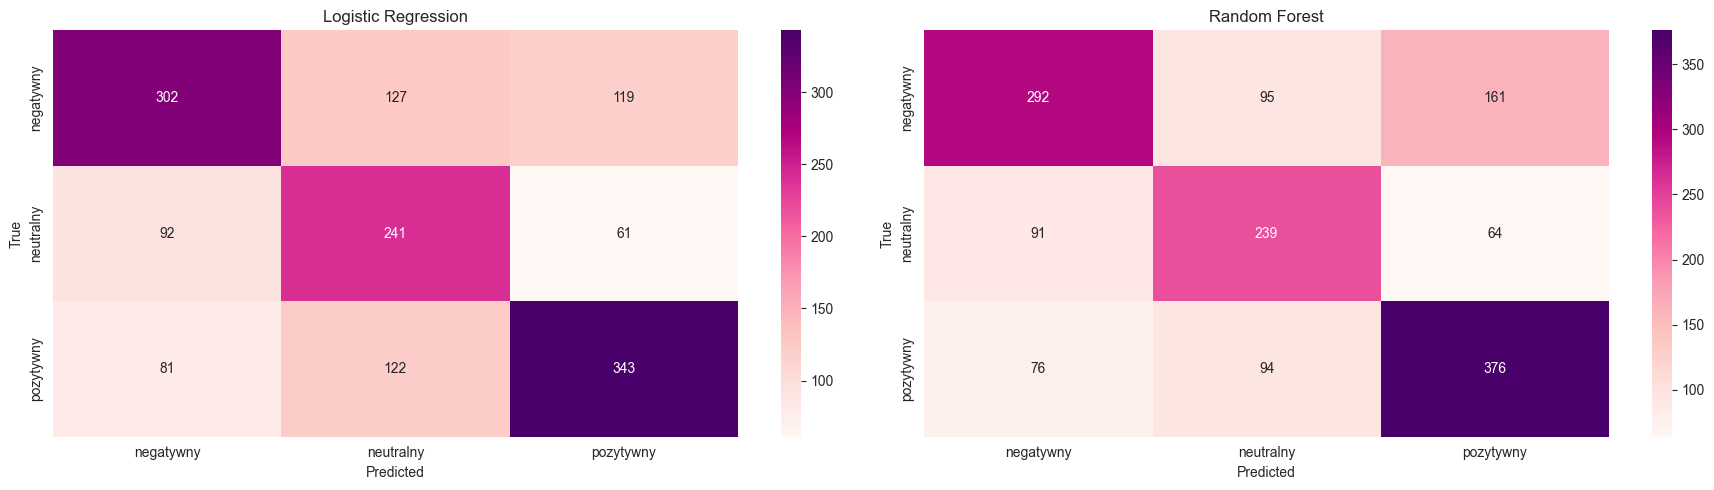

In [268]:
confusion_matrics(
    y_true = [y_test_tfidf, y_test_tfidf],
    y_pred = [y_pred_tfidf, y_pred_tfidf_rf],
    title = ['Logistic Regression', "Random Forest"]
)

W tym przypadku lepsze wyniki osiągnął model Random Forest, uzyskał nieco wyższe wyniki dla accuracy i F-1. 
Do dalszych proównań zostanie użyty model Random Forest